In [ ]:
#한글 깨짐 방지 코드

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,846 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/흡연자분류/train.csv')
test = pd.read_csv('/content/drive/MyDrive/흡연자분류/test.csv')

### 기초통계 파악
- 흡연:1 , 비흡연:0

In [ ]:
train.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0


In [ ]:
print(train.shape)
print('------------------')
print(train.info())

(7000, 18)
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        7000 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     7000 non-null   int64  
 8   혈압        7000 non-null   int64  
 9   중성 지방     7000 non-null   int64  
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(5), int64(12), object(1)
memory usage: 984.5+ KB
None


- 7000개 데이터, 16개 독립변수 존재
- 충치, 요 단백은 인코딩된 명목형 변수이며 나머지 14개 독립변수는 연속형 변수
- 각 컬럼별 결측값 존재 X


In [ ]:
print('충치 여부:' ,train['충치'].value_counts())
print('----------------------------------------')
print('요 단백 여부:' ,train['요 단백'].value_counts())

충치 여부: 0    5408
1    1592
Name: 충치, dtype: int64
----------------------------------------
요 단백 여부: 1    6618
2     231
3     107
4      34
5      10
Name: 요 단백, dtype: int64


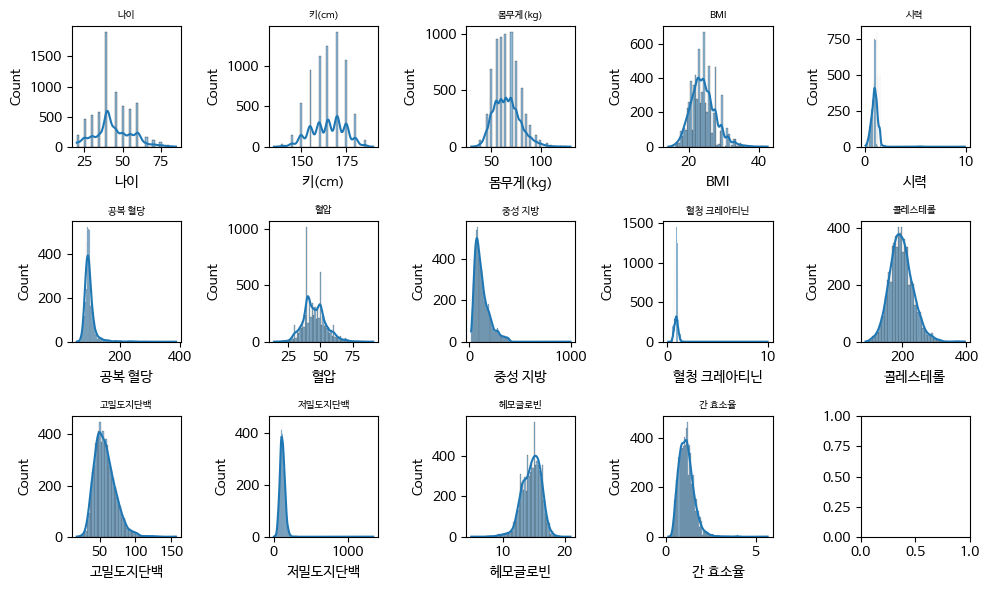

In [ ]:
data2 = ['나이', '키(cm)', '몸무게(kg)', 'BMI', '시력', '공복 혈당', '혈압', '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈', '간 효소율', ]
df2 = train[data2]
# 연속형 변수 히스토그램

plt.rcParams['font.family'] = 'NanumBarunGothic'
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

for i, column in enumerate(df2.columns):
    row = i // 5  # 행 인덱스 계산
    col = i % 5   # 열 인덱스 계산

    ax = sns.histplot(data=df2, x=column, kde=True, ax=axes[row, col])  # 서브플롯에 히스토그램 추가
    ax.set_title(f'{column}', fontsize=7)

plt.tight_layout()
plt.show()

- 시력, 혈청 크레아티닌, 저밀도지단백, 간 효소율은 한쪽 꼬리가 긴 형태이며 값의 범위가 타 변수에 비해 좁다

In [ ]:
df2.describe()

,나이,키(cm),몸무게(kg),BMI,시력,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,간 효소율
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011650,99.331857,45.532857,127.144714,0.884900,197.276571,57.355429,115.346857,14.631914,1.144696
std,12.063793,9.170213,12.978702,3.501945,0.427828,21.129670,8.820611,73.918492,0.241523,36.306494,14.506945,41.788153,1.540907,0.432735
min,20.000000,135.000000,30.000000,14.270000,0.100000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,0.140000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,0.840000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.100000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.380000
max,85.000000,190.000000,130.000000,42.450000,9.900000,386.000000,91.000000,999.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.670000


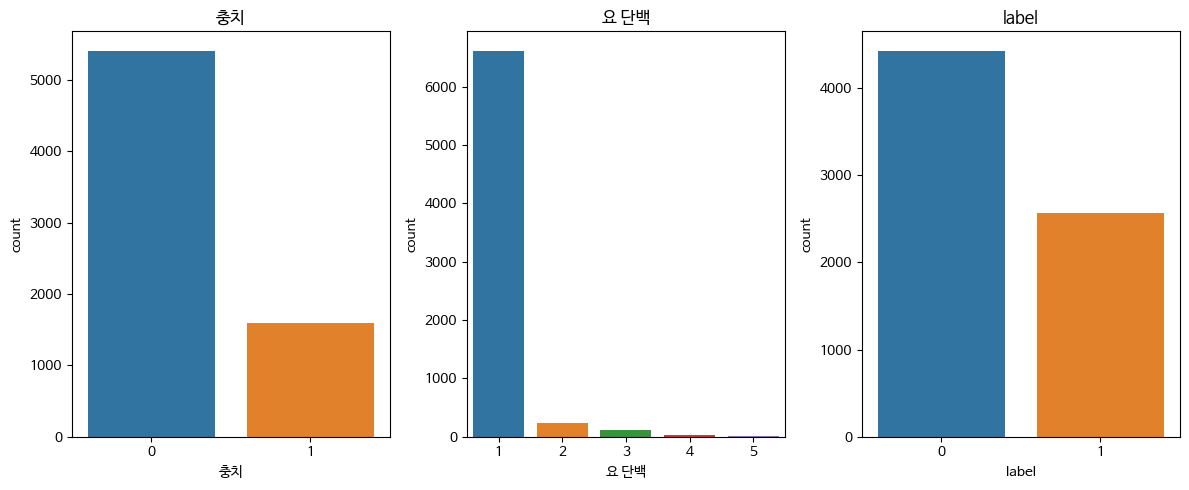

In [ ]:
data1 = ['요 단백','충치', 'label']
df1 = train[data1]

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title('충치')
sns.countplot(x='충치',data=df1)

plt.subplot(1,3,2)
plt.title('요 단백')
sns.countplot(x='요 단백', data=df1)

plt.subplot(1,3,3)
plt.title('label')
sns.countplot(x='label', data=df1)

plt.tight_layout()
plt.show();

- 범주형 변수의 경우, 미충치가 가장 많고, 요 단백 역시 1이 가장 큼

## 각 변수 간 관계파악

### (1) 연속형 변수간 관계 파악

In [ ]:
# 산점도 행렬

plt.figure(figsize=(15,15))
plt.rcParams['font.family'] = 'NanumBarunGothic'
sns.pairplot(train, diag_kind='kde',hue="label", palette='bright')
#plt.show()
plt.savefig('matrix.png')

In [ ]:
df2.corr(method='pearson')

,나이,키(cm),몸무게(kg),BMI,시력,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,간 효소율
나이,1.000000,-0.480407,-0.325932,-0.071149,-0.216682,0.174721,0.166057,0.014151,-0.092164,0.044430,0.006902,0.030729,-0.274701,0.184033
키(cm),-0.480407,1.000000,0.679202,0.159048,0.180353,0.021526,0.007481,0.152297,0.359088,-0.068569,-0.216463,-0.031526,0.532471,-0.269968
몸무게(kg),-0.325932,0.679202,1.000000,0.827904,0.140311,0.125889,0.123720,0.334948,0.302542,0.033737,-0.374190,0.046438,0.496626,-0.430321
BMI,-0.071149,0.159048,0.827904,1.000000,0.052919,0.154208,0.164654,0.338043,0.142320,0.092870,-0.344352,0.083688,0.273406,-0.376040
시력,-0.216682,0.180353,0.140311,0.052919,1.000000,-0.031137,-0.035915,0.040191,0.062909,-0.015442,-0.034189,-0.022997,0.125622,-0.076534
공복 혈당,0.174721,0.021526,0.125889,0.154208,-0.031137,1.000000,0.094005,0.215680,0.036418,0.002450,-0.119905,-0.004427,0.112592,-0.126626
혈압,0.166057,0.007481,0.123720,0.164654,-0.035915,0.094005,1.000000,0.084479,0.014200,-0.013312,-0.045961,-0.016803,0.045464,-0.046477
중성 지방,0.014151,0.152297,0.334948,0.338043,0.040191,0.215680,0.084479,1.000000,0.109465,0.239986,-0.425573,0.003956,0.276898,-0.289817
혈청 크레아티닌,-0.092164,0.359088,0.302542,0.142320,0.062909,0.036418,0.014200,0.109465,1.000000,-0.008888,-0.171014,0.030314,0.340487,-0.141611
콜레스테롤,0.044430,-0.068569,0.033737,0.092870,-0.015442,0.002450,-0.013312,0.239986,-0.008888,1.000000,0.167032,0.715751,0.079272,-0.081216


- 나이가 작을수록 키나 몸무게가 작은 것처럼 의료 관련 변수들도 나이에 따른 교호작용이 존재할 것이다

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

for i, column in enumerate(df2.columns):
    row = i // 5  # 행 인덱스 계산
    col = i % 5   # 열 인덱스 계산

    ax = sns.boxplot(data=df2, x=column, ax=axes[row, col])  # 서브플롯에 박스플롯 추가
    ax.set_title(f'{column}',fontsize=1)

plt.tight_layout()
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.show();

### target별 연속형 변수 빈도파악

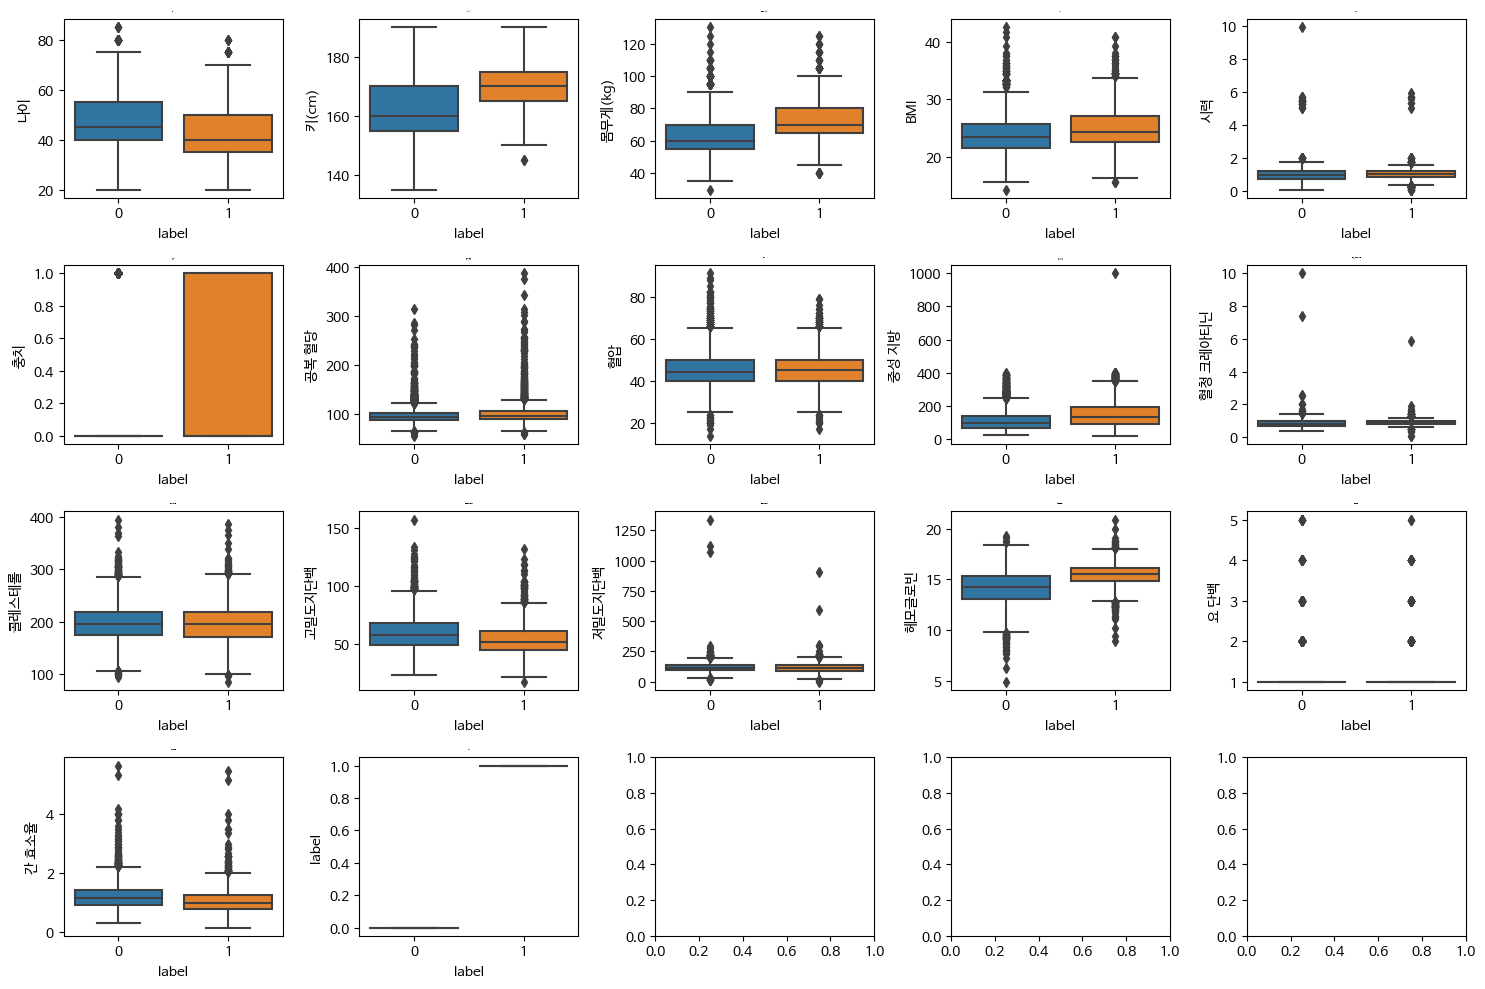

In [ ]:
box_data = train.iloc[:,1:]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))
plt.rcParams['font.family'] = 'NanumBarunGothic'

for i, column in enumerate(box_data.columns):
    row = i // 5  # 행 인덱스 계산
    col = i % 5   # 열 인덱스 계산

    ax = sns.boxplot(data=box_data, x='label',y=column, ax=axes[row, col])
    ax.set_title(f'{column}',fontsize=1)

plt.tight_layout()
plt.show();

- 중성지방, 헤목글로빈은 흡연자가 더 높은 수치를 기록했음
- 반면, 고밀도지단백, 간효소율, 혈압 등은 비흡연자가 더 높은 수치를 기록했음
- 이는 연령에 따른 상호작용 효과가 배제되지 않아서라는 추론할 수 있음
- 따라서 나이구간을 나눈 뒤, 각 구간별 통계량을 파악해야 할듯 함

#### 나이 구간별 흡연자, 비흡연자 수 파악
- 나이는 20~85세까지 존재하면 5세 단위로 존재함

In [ ]:
age_df = train.groupby(['나이', 'label']).size().unstack(fill_value=0)
age_df = age_df.reset_index()
age_df.columns.name = None  # 컬럼명의 레벨명 제거
age_df.rename(columns={'label': '나이'}, inplace=True)

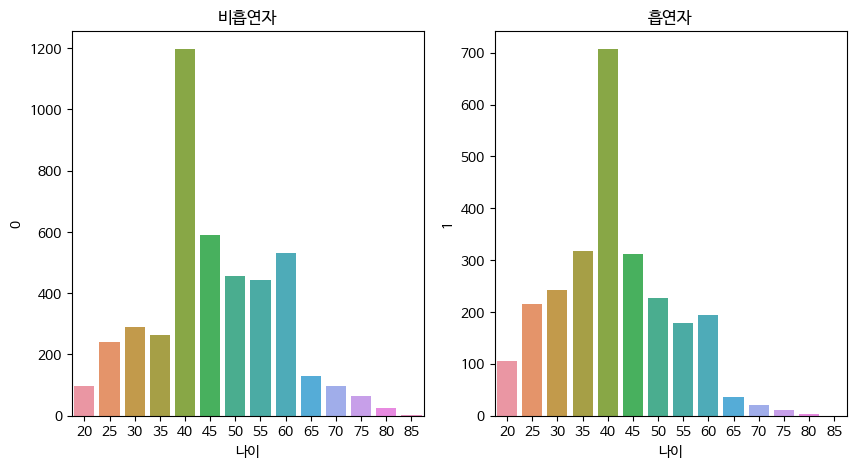

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('비흡연자')
sns.barplot(data=age_df, x='나이',y=0)

plt.subplot(1,2,2)
plt.title('흡연자')
sns.barplot(data=age_df, x='나이',y=1)
plt.show();

파악 결과, 각 나이 구간별 흡연, 비흡연 비율은 비슷하다

#### 나이, 흡연여부별 다른 변수들의 평균값 파악
- 목적: 나이 구간별로 흡연자와 비흡연자간에 다른 변수들의 평균값에 차이가 존재할까?
- 중성 지방은 나이가 많아질수록 비흡연자와 흡연자 간의 차이가 크게 남
- 가설을 검정해볼까?

In [ ]:
# 평균값을 계산할 변수 리스트
variable_list = ['키(cm)', '몸무게(kg)', 'BMI', '시력', '공복 혈당', '혈압',
       '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈', '요 단백',
       '간 효소율']

# 각 변수에 대한 나이와 label별 평균값 계산
mean_values = train.groupby(['나이', 'label'])[variable_list].mean().reset_index()

In [ ]:
mean_values.sort_values(by=['나이','label']).head()

,나이,label,키(cm),몸무게(kg),BMI,시력,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
0,20,0,171.302083,73.437500,24.973125,1.191667,92.343750,46.197917,98.541667,0.954167,181.781250,56.104167,105.864583,15.498958,1.062500,1.049687
1,20,1,171.238095,69.857143,23.816952,1.108095,93.971429,45.714286,111.400000,0.931429,173.628571,56.990476,94.323810,15.769524,1.076190,1.127333
2,25,0,172.614108,74.170124,24.864108,1.110581,93.568465,45.991701,105.842324,0.985062,188.775934,57.344398,113.917012,15.578838,1.062241,1.029710
3,25,1,171.930233,73.581395,24.839395,1.027442,95.153488,45.972093,121.804651,0.964651,186.818605,57.344186,105.009302,15.776279,1.046512,1.038884
4,30,0,172.041522,73.183391,24.678547,1.096540,93.231834,45.217993,120.238754,0.967474,192.352941,55.311419,113.114187,15.566090,1.069204,1.008235


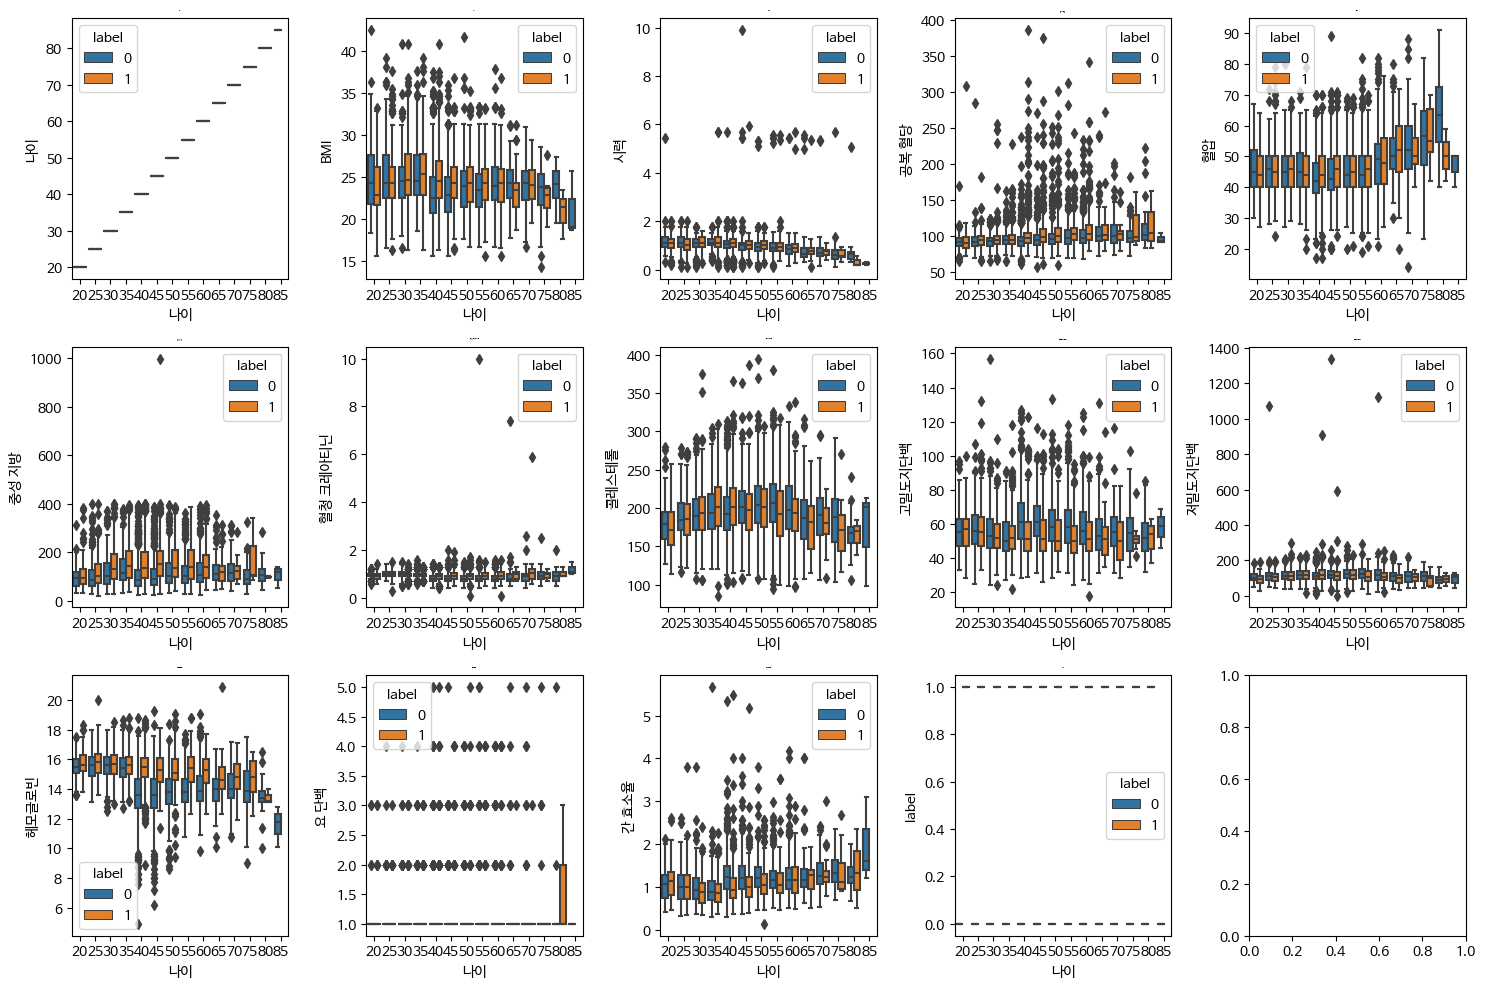

In [ ]:
# sns.boxplot(data=train, x='나이',y='중성 지방',hue='label')

col_name = ['나이','BMI', '시력', '공복 혈당', '혈압',
           '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈', '요 단백',
           '간 효소율', 'label']

box_data = train[col_name]

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
plt.rcParams['font.family'] = 'NanumBarunGothic'

for i, column in enumerate(box_data.columns):
    row = i // 5  # 행 인덱스 계산
    col = i % 5   # 열 인덱스 계산

    ax = sns.boxplot(data=box_data, x='나이',y=column, hue='label',ax=axes[row, col])
    ax.set_title(f'{column}',fontsize=1)

plt.tight_layout()
plt.show();

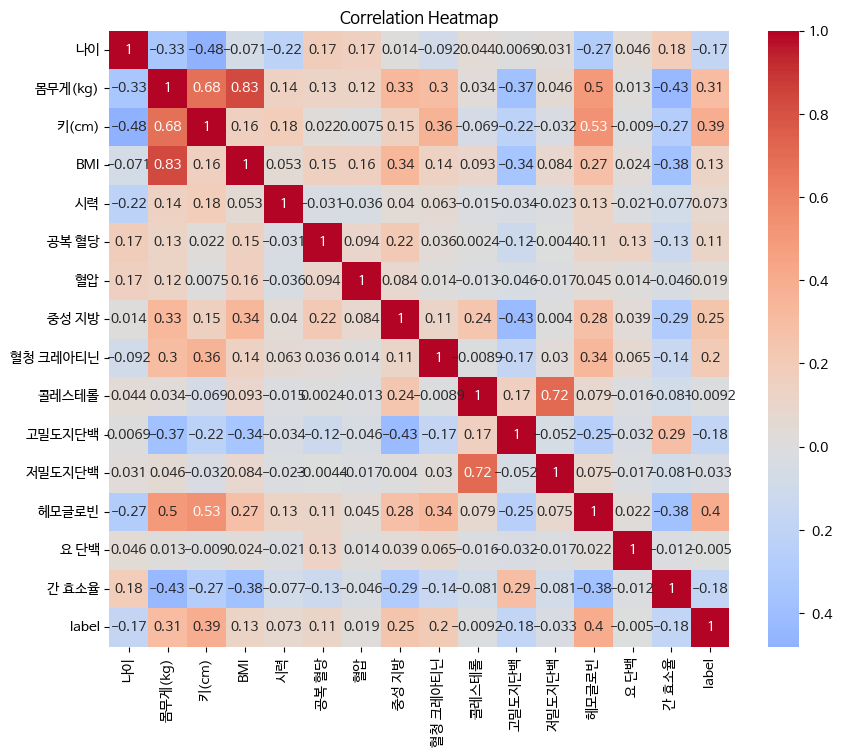

In [ ]:
# 상관관계 행렬 생성
col_name = ['나이','몸무게(kg)','키(cm)','BMI', '시력', '공복 혈당', '혈압',
           '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈', '요 단백',
           '간 효소율']

corr_matrix = train[col_name + ['label']].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

#### 범주형 변수간 상관파악
- 충치와 흡연 여부: 카이제곱 검정 결과 유의 ㅇ
- 요 단백과 흡연 여부: 카이제곱 검정 결과 유의 x

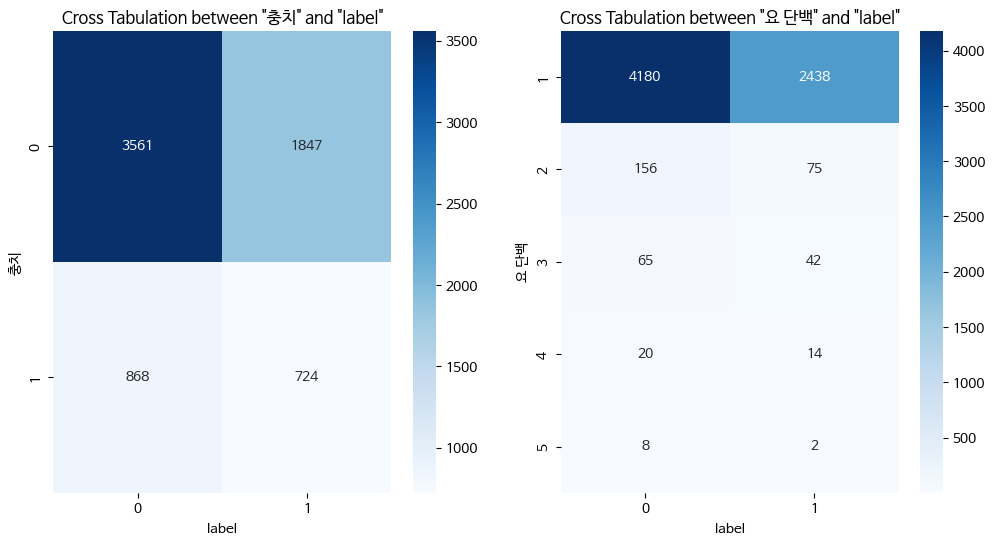

In [ ]:
cross_tab1 = pd.crosstab(train['충치'], train['label'])
cross_tab2 = pd.crosstab(train['요 단백'], train['label'])

# 크로스 탭 시각화
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.heatmap(cross_tab1, annot=True, cmap='Blues', fmt='d')
plt.title('Cross Tabulation between "충치" and "label"')
plt.xlabel('label')
plt.ylabel('충치')

plt.subplot(1,2,2)
sns.heatmap(cross_tab2, annot=True, cmap='Blues', fmt='d')
plt.title('Cross Tabulation between "요 단백" and "label"')
plt.xlabel('label')
plt.ylabel('요 단백')
plt.show()

In [ ]:
#pd.crosstab(train['충치'], train['label'], normalize='columns')

In [ ]:
# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab1)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-squared value: 67.38566768794314
P-value: 2.2326611038095596e-16
Degrees of Freedom: 1
Expected Frequencies:
[[3421.71885714 1986.28114286]
 [1007.28114286  584.71885714]]


In [ ]:
from scipy.stats import chi2_contingency

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab2)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-squared value: 3.6264339007145683
P-value: 0.45891590480965294
Degrees of Freedom: 4
Expected Frequencies:
[[4.18730314e+03 2.43069686e+03]
 [1.46157000e+02 8.48430000e+01]
 [6.77004286e+01 3.92995714e+01]
 [2.15122857e+01 1.24877143e+01]
 [6.32714286e+00 3.67285714e+00]]


#### 나이와 흡연 여부와의 관련성
- 수집한 표본의 특징을 고려할 필요가 있을까?
- 막대 그래프를 확인해보면 대체적으로 나이에 따라 흡연자 비율이 비슷하다

<Axes: xlabel='나이'>

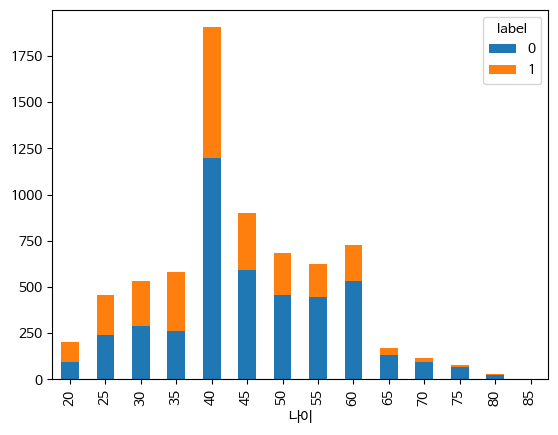

In [ ]:
age_label_counts = train.groupby(['나이', 'label']).size().unstack(fill_value=0)
age_label_counts.plot(kind='bar', stacked=True)

In [ ]:
age_label_counts = age_label_counts.reset_index()
age_label_counts.columns.name = None
age_label_counts.rename(columns={'label': '나이'}, inplace=True)
age_label_counts['비흡연 비율'] = age_label_counts[0]/(age_label_counts[0]+age_label_counts[1])

In [ ]:
age_label_counts

,나이,0,1,비흡연 비율
0,20,96,105,0.477612
1,25,241,215,0.528509
2,30,289,243,0.543233
3,35,263,317,0.453448
4,40,1197,707,0.628676
5,45,590,312,0.654102
6,50,455,227,0.667155
7,55,444,179,0.712681
8,60,531,195,0.731405
9,65,131,37,0.779762


#### 나이에 대한 고찰
- 나이에 따라 상호작용이 존재하나 나이에 따른 분류가 아닌 모델을 만드는게 목적

### pca를 활용한 변수 선정

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df2_standardized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)


pca = PCA(n_components=6)
printcipalComponents = pca.fit_transform(df2_standardized)

principalDf = pd.DataFrame(data=printcipalComponents,
                           columns = [f"pca{num+1}" for num in range(6)])
# 주성분으로 이루어진 데이터 프레임 구성

pca_data = pd.DataFrame({'고윳값': pca.explained_variance_,
                        '기여율': pca.explained_variance_ratio_},
                       index=np.array([f"pca{num+1}" for num in range(6)]))
pca_data['누적 기여율'] = pca_data['기여율'].cumsum()



pca_df = pd.DataFrame(data=printcipalComponents, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'])
result = pd.concat([train, pca_df], axis=1)

In [ ]:
a = np.round(pca.components_[0],3)
a = a.tolist()
b = np.round(pca.components_[1],3)
b = b.tolist()

pca_data = {'pca1' : a, 'pca2' : b}
df_pca = pd.DataFrame(pca_data, index= df2_standardized.columns)
df_pca.sort_values(by='pca1',ascending=False)

,pca1,pca2
몸무게(kg),0.471,-0.032
헤모글로빈,0.367,-0.053
키(cm),0.365,-0.278
BMI,0.360,0.166
중성 지방,0.272,0.243
혈청 크레아티닌,0.230,-0.097
시력,0.112,-0.171
공복 혈당,0.104,0.174
혈압,0.062,0.123
저밀도지단백,0.053,0.540


- 첫 번째 주성분을 기준으로 설명력이 높은 변수는 몸무게, 헤모글로빈, 키, BMI, 중성 지방, 혀청 크레아티닌, 간 효소율, 고밀도지단백, 나이

In [ ]:
col = ['몸무게(kg)', '헤모글로빈', '키(cm)', 'BMI', '중성 지방', '혈청 크레아티닌', '간 효소율', '고밀도지단백', '나이']

In [ ]:
new_train = train[col]

In [ ]:
new_train = new_train.drop(columns={'키(cm)','몸무게(kg)','헤모글로빈','BMI'})

### 다중공선성 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train.values, i) for i in range(new_train.shape[1])]
vif["features"] = new_train.columns

In [ ]:
vif[~np.isinf(vif['VIF Factor'])].sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
3,12.828248,고밀도지단백
4,12.283163,나이
1,10.150539,혈청 크레아티닌
2,8.933034,간 효소율
0,3.969147,중성 지방
